---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Distributions in Pandas

Let's start with a discussion of distributions. And we'll start with the most common using a coin. When a coin is flipped it has a probability of landing heads up and a probability of landing tails up. If we flip a coin many times we collect a number of measurements of the heads and tails that landed face up and intuitively we know that the number of times we get a heads up will be equal about the number of times we get a tails up for a fair coin. If you flipped a coin a hundred times and you received heads each time you'd probably doubt the fairness of that coin. We can consider the result of each flip of this coin as a **random variable.** 

When we can consider the set of all possible random variables together we call this a **distribution**. In this case the distribution is called **binomial** since there's two possible outputs a heads or a tails. It's also an example of a **discreet distribution** since there are only categories being used a heads and a tails and not real numbers. 

 <img src="distributions.png" title="Distributions" alt="Distribution png">


NumPy actually has some distributions built into it allowing us to make random flips of a coin with given parameters. Let's give it a try.

In [3]:
import pandas as pd
import numpy as np

Here we ask for a number from the NumPy binomial distribution. We have two parameters to pass in: the first is the number of times we want it to run. The second is the chance we get a zero, which we will use to represent heads here. Let's run one round of this simulation. 

In [3]:
np.random.binomial(1, 0.5)

1

What if we run the simulation a thousand times and divided the result by a thousand. Well you see a number pretty close to 0.5 which means half of the time we had a heads and half of the time we had a tails. 

In [4]:
np.random.binomial(1000, 0.5)/1000

0.5

Suppose we want to simulate the probability of flipping a fair coin 20 times, and getting a number greater than or equal to 15. We can use **np.random.binomial(n,p,size) to do 10000 simulations of flipping a fair coin 20 times**, then see what proportion of the simulations are 15 or greater

In [18]:
x = np.random.binomial(20, .5, 1000)
print((x>=15).mean())

0.009


Of course an **even weighted binomial distribution is only one simple example**. We can also have **unevenly weighted binomial distributions**. For instance what's the chance although we're tornado today while I’m filming. It's pretty low even though we do get tornadoes here. So maybe there a hundredth of a percentage chance. We can put this into a binomial distribution as a weighting in NumPy. If we run this 100,000 times we see there are pretty minimal tornado events. 

In [5]:
chance_of_tornado = 0.01/100
np.random.binomial(100000, chance_of_tornado)

10

The computational tools allow us to simulate the world which helps us answer questions. A simulation is essentially another form of inquiry. Let's take one more example. Let's say the chance of a tornado here in Ann Arbor on any given day, is 1% regardless of the time of year. That's higher than realistic but it makes for a quicker demo. And lets say if there's a tornado I'm going to get away from the windows and hide, then come back and do my recording the next day. So what's the chance of this happening two days in a row?

We can use the binomial distribution in NumPy to simulate this. We start by creating an empty list and then we create a number of potential tornado events by asking the NumPy binomial function using our chance of tornado. We'll do this a million times which is just shy of 3,000 years worth of events. This process is called **sampling the distribution.**

Now we can write a little loop to go through the list and look for any two adjacent pairs of ones which means that there were two days that had back to back tornadoes. We see that this ends up being roughly 102 day tornado events over the 3,000 years. Which frankly is still too many for me. My point here though is that modern computational power allows us to very quickly simulate the effects of different parameters in a distribution. Leading to a new way of understanding the problem. You don't have to work out all the math you can quite often simulate the problem instead and observe the results. 

In [20]:
chance_of_tornado = 0.01

tornado_events = np.random.binomial(1, chance_of_tornado, 1000000)
    
two_days_in_a_row = 0
for j in range(1,len(tornado_events)-1):
    if tornado_events[j]==1 and tornado_events[j-1]==1:
        two_days_in_a_row+=1

print('{} tornadoes back to back in {} years'.format(two_days_in_a_row, 1000000/365))

103 tornadoes back to back in 2739.72602739726 years


Many of the distributions you use in data science are not discrete binomial, and instead are **continuous, where the value of the given observation isn't a category like heads or tails, but can be represented as a real number**. It's common to then graph these distributions when talking about them, where the x axis is the value of the observation and the y axis represents the probability that a given observation will occur. 

If all numbers are equally likely to be drawn when you sample from it, this should be graphed as a flat horizontal line. And this flat line is actually called the **uniform distribution.**

 <img src="uniform_distribution_continuous.png" title="Uniform Distributions" alt="Uniform Distribution png">

There are few other distributions that get a lot more interesting. Let's take the **normal distribution** which is also called the **Gaussian Distribution** or sometimes, a **Bell Curve**. This distribution looks like a hump, where the number which has the highest probability of being drawn is a zero, and there are two decreasing curves on either side of the X axis.

 <img src="normal_distribution.png" title="Normal Distributions" alt="Normal Distribution png">

One of the properties of this distribution is that the **mean is zero**, and that the two curves on either side are symmetric. I want to introduce you to the term **expected value**. I think that most of us are familiar with the mean is the sum of all the values divided by the total number of values. Calculating a mean value is a computational process, and it takes place by looking at samples from distribution. For instance rolling a die three times might give you the numbers 1, 2 and 6, the mean value is then 4.5. **The expected value is the probability from the underlying distribution**. It is what would be the mean of a die roll if we did an infinite number of rolls. The result is 3.5 since each face of the die is equally likely to appear. Thus the expected value is 3.5, while the mean value depends upon the samples that we've taken, and converges to the expected value given a sufficiently large sample set. A second property is that the **variance of the distribution** can be described in a certain way. The variance is **a measure of how badly values of samples are spread out from the mean**. Let's get a little bit more formal about five different characteristics of distributions. First, we can talk about the **distribution’s central tendency**, and the measures we would use for this are **mode, median, or mean**. This characteristic is really about **where the bulk of probability is in the distribution**. We can also talk about the **variability in the distribution**. There are a couple of ways we can speak of this. **The standard deviation** is one, the **interquartile range** is another. **The standard deviation is simply a measure of how different each item, in our sample is from the mean.** 

In [2]:
np.random.uniform(0, 1)

0.41277130665579875

In [6]:
np.random.normal(0.75)

1.7082862672181012

Formula for standard deviation
$$\sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \overline{x})^2}$$

It might look a little more intimidating than it actually is. Let's just walk through how we would write this up. Let's draw 1,000 samples from a normal distribution with an expected value of 0.75 and a standard deviation of 1. Then we calculate the actual mean using NumPy's mean feature. The part inside the summation says xi - xbar. **xi is the current item in the list and xbar is the mean**. So we calculate the difference, then we square the result, then we sum all of these.

This might be a reasonable place to use a map and apply a lambda to calculate the differences between the mean and the measured value, then to convert this back to a list, so NumPy can use it. Now we just have to square each value, sum them together, and take the square root. So that's **the size of our standard deviation. It covers roughly 68% of the area around the mean, split evenly around the side of the mean**. Now we don't normally have to do all this work ourselves, but I wanted to show you how you can sample from the distribution, create a precise programmatic description of a formula, and apply it to your data.

In [10]:
distribution = np.random.normal(0.75,size=1000)

np.sqrt(np.sum((np.mean(distribution)-distribution)**2)/len(distribution))

0.9811898138480224

For standard deviation, which is just one particular measure of variability, NumPy has a built-in function that you can apply, called **std**.

In [11]:
np.std(distribution)

0.9811898138480224

There's a couple more measures of distributions that are interesting to talk about. One of these is **the shape of the tales of the distribution** and this is called the **kurtosis**. We can measure the kurtosis using the statistics functions in the **SciPy package**. A **negative value means the curve is slightly more flat than a normal distribution, and a positive value means the curve is slightly more peaky than a normal distribution**. Remember that **we aren't measuring the kurtosis of the distribution per se, but of the thousand values which we sampled out of the distribution**. This is a sublet but important distinction.

In [12]:
import scipy.stats as stats
stats.kurtosis(distribution)

-0.19300083724947958

We could also move out of the normal distributions and push the peak of the curve one way or the other. And this is called the **skew**.If we test our current sample data, we see that there isn't much of a skew.

In [13]:
stats.skew(distribution)

0.0003354557069775936

Let's take a look at a distribution called the **Chi Squared distribution**, which is also quite commonly used in statistics. The Chi Squared Distribution has only one parameter called the **degrees of freedom**. The degrees of freedom is closely related to the **number of samples that you take from a normal population**, and it's important for significance testing. But what I would like you to observe, is that **as the degrees of freedom increases, the shape of the Chi Squared distribution changes**. In particular, the skew to the left begins to move towards the center. We can observe this through simulation.

 <img src="chi-squared-distribution.png" title="Chi Squared Distribution" alt="chi-squared-distribution.png">

First we'll sample 1,000 values from a Chi Squared distribution with degrees of freedom 2. Now we can see that the skew is quite large.

In [14]:
chi_squared_df2 = np.random.chisquare(2, size=10000)
stats.skew(chi_squared_df2)

2.1136699991722754

Now if we resample changing degrees of freedom to 5. We see that the skew has decreased significantly. 

In [15]:
chi_squared_df5 = np.random.chisquare(5, size=10000)
stats.skew(chi_squared_df5)

1.3163138967396069

We can actually plot this right in the Jupyter notebook. You can see a histogram with our plot with the two degrees of freedom is skewed much further to the left, while our plot with the five degrees of freedom is not as highly skewed. 

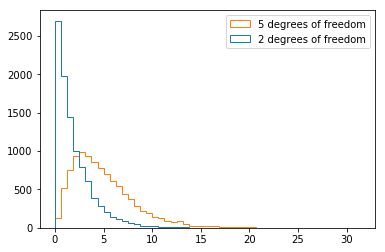

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

output = plt.hist([chi_squared_df2,chi_squared_df5], bins=50, histtype='step', 
                  label=['2 degrees of freedom','5 degrees of freedom'])
plt.legend(loc='upper right')


The last aspect of distributions that I want to talk about is the **modality**. So far, all of the distributions I've shown have a single high point, a peak. But what if we have multiple peaks? This distribution has two high points, so we call it **bimodal**. These are really interesting distributions and **happen regularly in data mining**. A useful insight is that **we can actually model these using two normal distributions with different parameters**. These are called **Gaussian Mixture Models** and are particularly useful when **clustering data**. 

 <img src="binomial_distributions.png" title="Binomial Distribution" alt="binomial distribution.png">

Remember that **a distribution is just a shape that describes the probability of a value being pulled when we sample a population**. And NumPy and SciPy each have a number of different distributions built in for us to be able to sample from. 

# Hypothesis Testing

We use statistics in a lot of different ways in data science. In this lecture, I want to refresh your knowledge of **hypothesis testing**, which is a core data analysis activity behind experimentation. We're starting to see experimentation used more and more commonly outside of academic scientific, and in day to day business environments. Part of the reason for this is the rise of big data and web commerce. It's now easy to change your digital storefront and deliver a different experience to some of your customers, and then see how those customer actions might differ from one another. For instance, if you sell books, you might want to have one condition where the cover of the book is featured prominently on the web page and another condition where the focus is on the author and the reviews of the book. This is often called **A/B testing**. And while it's not unique to this time in history, it's now becoming so common that if you're using a website, you are undoubtedly part of an A/B test somewhere. This raises some interesting **ethical questions**.

**A hypothesis is a statement that we can test**. I'll pull an example from my own research area of educational technology and learning analytics. Let's say that we have an expectation that when a new course is launched on a MOOC platform, the keenest students find out about it and all flock to it. Thus, we might expect that those students who sign up quite quickly after the course is launched will have higher performance than those students who signed up after the MOOC has been around for a while. In this example, we have samples from two different groups which we want to compare. The early sign ups and the late sign ups.

When we do hypothesis testing, we **hold out that our hypothesis as the alternative and we create a second hypothesis called the null hypothesis**, which in this case would be that there is no difference between groups. We then examine the groups to determine whether this null hypothesis is true or not. 
If we find that there is a difference between groups, then we can reject the null hypothesis and we accept our alternative. There are subtleties in this description. We aren't saying that our hypothesis is true per se, but we're saying that there's evidence against the null hypothesis. So, we're more confident in our alternative hypothesis. 

Let's see an example of this. We can load a file called grades.csv.

In [17]:
df = pd.read_csv('grades.csv')

If we take a look at the DataFrame inside, we see we have six different assignments, each with a submission time.

In [18]:
df.head()

,student_id,assignment1_grade,assignment1_submission,assignment2_grade,assignment2_submission,assignment3_grade,assignment3_submission,assignment4_grade,assignment4_submission,assignment5_grade,assignment5_submission,assignment6_grade,assignment6_submission
0,B73F2C11-70F0-E37D-8B10-1D20AFED50B1,92.733946,2015-11-02 06:55:34.282000000,83.030552,2015-11-09 02:22:58.938000000,67.164441,2015-11-12 08:58:33.998000000,53.011553,2015-11-16 01:21:24.663000000,47.710398,2015-11-20 13:24:59.692000000,38.168318,2015-11-22 18:31:15.934000000
1,98A0FAE0-A19A-13D2-4BB5-CFBFD94031D1,86.790821,2015-11-29 14:57:44.429000000,86.290821,2015-12-06 17:41:18.449000000,69.772657,2015-12-10 08:54:55.904000000,55.098125,2015-12-13 17:32:30.941000000,49.588313,2015-12-19 23:26:39.285000000,44.629482,2015-12-21 17:07:24.275000000
2,D0F62040-CEB0-904C-F563-2F8620916C4E,85.512541,2016-01-09 05:36:02.389000000,85.512541,2016-01-09 06:39:44.416000000,68.410033,2016-01-15 20:22:45.882000000,54.728026,2016-01-11 12:41:50.749000000,49.255224,2016-01-11 17:31:12.489000000,44.329701,2016-01-17 16:24:42.765000000
3,FFDF2B2C-F514-EF7F-6538-A6A53518E9DC,86.030665,2016-04-30 06:50:39.801000000,68.824532,2016-04-30 17:20:38.727000000,61.942079,2016-05-12 07:47:16.326000000,49.553663,2016-05-07 16:09:20.485000000,49.553663,2016-05-24 12:51:18.016000000,44.598297,2016-05-26 08:09:12.058000000
4,5ECBEEB6-F1CE-80AE-3164-E45E99473FB4,64.813800,2015-12-13 17:06:10.750000000,51.491040,2015-12-14 12:25:12.056000000,41.932832,2015-12-29 14:25:22.594000000,36.929549,2015-12-28 01:29:55.901000000,33.236594,2015-12-29 14:46:06.628000000,33.236594,2016-01-05 01:06:59.546000000


And it looks like there are just under 3,000 entries in this data file.

In [19]:
len(df)

2315

For the purpose of this lecture, let's segment this population into two pieces. Those who finish the first assignment by the end of December 2015 and those who finish it sometimes after that.

In [20]:
early = df[df['assignment1_submission'] <= '2015-12-31']
late = df[df['assignment1_submission'] > '2015-12-31']

As you've seen, the pandas DataFrame object has a variety of statistical functions associated with it. If we call the mean function directly on the DataFrame, we see that each of the means for the assignments are calculated. 

Note that the **datetime values are ignored as panda's knows this isn't a number, but an object type**.

In [21]:
early.mean()

assignment1_grade    74.972741
assignment2_grade    67.252190
assignment3_grade    61.129050
assignment4_grade    54.157620
assignment5_grade    48.634643
assignment6_grade    43.838980
dtype: float64

If we look at the mean values for the late DataFrame as well, we get surprisingly similar numbers. There are slight differences, though. It looks like the end of the six assignments, the early users are doing better by about a percentage point.

In [22]:
late.mean()

assignment1_grade    74.017429
assignment2_grade    66.370822
assignment3_grade    60.023244
assignment4_grade    54.058138
assignment5_grade    48.599402
assignment6_grade    43.844384
dtype: float64

So, is this enough to go ahead and make some interventions to actually try and change something in the way we teach? When doing hypothesis testing, **we have to choose a significance level as a threshold** for how much of a chance we're willing to accept. **This significance level is typically called alpha**. It can vary greatly, depending on what you're going to do with the result and the amount of noise you expect in your data.

For instance, **in social sciences research, a value of 0.05 or 0.01 is often used**, which indicates a tolerance for a probability between 5% and 1% of chance. **In a physics experiment where the conditions are much more controlled and thus, the burden of proof is much higher, you might expect to see alpha levels of 10 to the negative 5 or 100,000th of a percentage.**

You can think of the significance level from the perspective of interventions as well and this is something I run into regularly with my research. What am I going to do when I find out that two student populations are different? For instance, if I'm going to send an email nudge to encourage students to continue working on their homework, that's a pretty low-cost intervention. Emails are cheap and while I certainly don't want to annoy students, one extra email isn't going to ruin their day. But what if the intervention is a little more involved, like having our tutorial assistant followup with a student via phone? This is all of a sudden much more expensive for both the institution and for the student. So, I might want to ensure a higher burden of proof.

So **the threshold you set for alpha depends on what you might do with the result, as well**. For this example, let's use a threshold of 0.05 for our alpha or 5%. Now, how do we actually test whether these means are different in Python? The **SciPy library contains a number of different statistical tests and forms a basis for hypothesis testing in Python**. A **t-test is one way to compare the means of two different populations**. In the SciPy library, the **ttest_ind function will compare two independent samples to see if they have different means**. I'm not going to go into the details of any of this statistical tests here, but instead, we'd recommend that you check out the Wikipedia page on particular test or consider taking a full statistics course if this is unfamiliar to you. But I do want to note that most statistical tests expect that **the data conforms to a certain distribution, a shape**. So, you shouldn't apply such tests blindly and should investigate your data first.

In [23]:
from scipy import stats
stats.ttest_ind?

If we want to compare the assignment grades for the first assignment between the two populations, we could generate a t-test by passing these two series into the ttest_ind function. **The result is a tuple with a test statistic and a p-value**. 

In [24]:
stats.ttest_ind(early['assignment1_grade'], late['assignment1_grade'])

Ttest_indResult(statistic=1.400549944897566, pvalue=0.16148283016060577)

The p-value here is much larger than our 0.05. So we cannot reject the null hypothesis, which is that the two populations are the same. In more lay terms, we would say that there's no statistically significant difference between these two sample means.

Let's check with assignment two grade.

In [25]:
stats.ttest_ind(early['assignment2_grade'], late['assignment2_grade'])

Ttest_indResult(statistic=1.3239868220912567, pvalue=0.18563824610067967)

No, that's much larger than 0.05 too. How about with assignment three? 

In [26]:
stats.ttest_ind(early['assignment3_grade'], late['assignment3_grade'])

Ttest_indResult(statistic=1.7116160037010733, pvalue=0.087101516341556676)

Well, that's much closer, but still beyond our threshold value. It's important to stop here and talk about **serious process problem with how we're handling this investigation** of the difference between these two populations. **When we set the alpha to be 0.05, we're saying that we expect it that there will be positive result, 5% of the time just due to chance**. As we run more and more t-tests, we're more likely to find a positive result just because of the number of t-tests we have run.

When a data scientist runs many tests in this way, it's called **p-hacking or dredging and it's a serious methodological issue**. P-hacking results in **spurious correlations instead of generalizable results**. There are a couple of different ways you can deal with p-hacking. The first is called the **Bonferroni correction**. In this case, you simply tighten your alpha value, the threshold of significance, based on the number of tests you're running. So if you choose 0.05 with 1 test, and you want to run 3 tests, you reduce alpha by multiplying 0.05 by one-third to get a new value of 0.017. I personally find this approach to be very conservative. Another option is to **hold out some of your data for testing to see how generalizable your result is**. In this case, we might take half of our data for each of the two DataFrames, run our t-test with that, form specific hypothesis based on the result of these tests, then run very limited tests on the rest of the data.

**This method is actually heavily used in machine learning when building predictive models**, where it's called cross fold validation. A final method which has come about is the **pre-registration** of your experiment. 
In this step, you would **outline what you expect to find and why, and describe the test that would backup a positive proof of this**. You register it with a third party, in academic circles, this is often a journal who determines whether it's a reasonable test to run or not. You then run your study and report the results, regardless as to whether they were positive or not. Here, there is a larger burden on connecting to existing theory since you need to convince reviewers that the experiment is likely to test fully a given hypothesis. In this lecture, we've discussed just some of the basics of hypothesis testing in Python. 

I introduced you to the SciPy library, which you can use for t-testing. We've discussed some of the practical issues which arise from looking for statistical significance. There's much more to learn about hypothesis testing. For instance, there are different tests used, depending on the shape of your data, and different ways to report results instead of just p-values, such as confidence intervals. But I hope this gives you a start to comparing the means of two different populations, which is a common task for data scientists, and we'll followup some of this work in the second course in this series.

 <img src="p-hacking.png" title="p-hacking slikde" alt="p-hacking.png">